In [1]:
# IMPORT LIBRARIES

import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import set_option
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline 

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import performance metrics/measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report





In [2]:
# created a .csv version of the original dataset (.xls)
data = "credit.csv"

# Pandas options
set_option('display.max_colwidth', None)
set_option('precision', 2)

In [3]:
# read input
data = pd.read_csv(data)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Class labels')

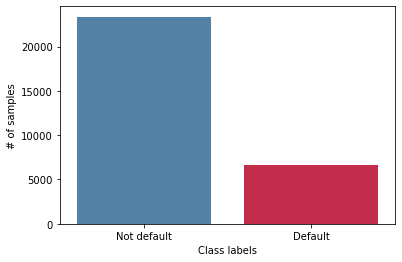

In [4]:
sns.countplot('default payment next month', data=data, palette=['steelblue','crimson'])
plt.xticks([0,1],['Not default','Default'])
plt.ylabel('# of samples')
plt.xlabel('Class labels')
#plt.savefig('Fig - Class Distribution Histogram.png')

In [5]:
# Check data types 
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [6]:
# Check missing values: no as can be also seen with data.info()
data.isnull().values.any()


False

<AxesSubplot:>

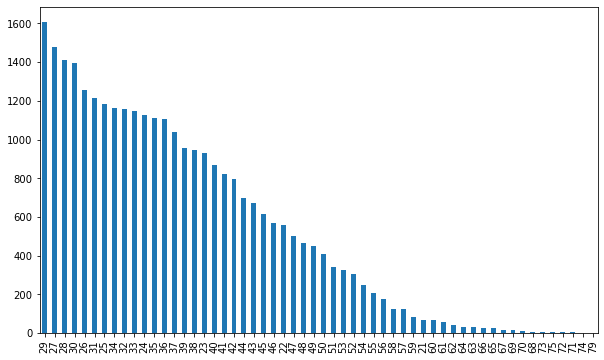

In [7]:
data['AGE'].value_counts().plot(kind='bar', figsize=(10,6))

In [8]:
# Summary Statistics
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5.92e+03,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,2.30e+04,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,8.33e+02,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5.00e+03,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


In [9]:
# rename variable 'PAY_0' to 'PAY_1' 
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
# rename target variable: 'default.payment.next.month' to 'Default'
data.rename(columns={"default payment next month": "Default"}, inplace=True)
# drop first attribute "ID"
data.drop('ID', axis = 1, inplace =True)
# Class label to category
data["Default"] = data["Default"].astype('category')

In [10]:
data.dtypes

LIMIT_BAL       int64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
PAY_1           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
Default      category
dtype: object

In [11]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [13]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
tot = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[tot, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [15]:
data = data.drop(data[data['MARRIAGE']==0].index)
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)


Text(0, 0.5, '# of clients')

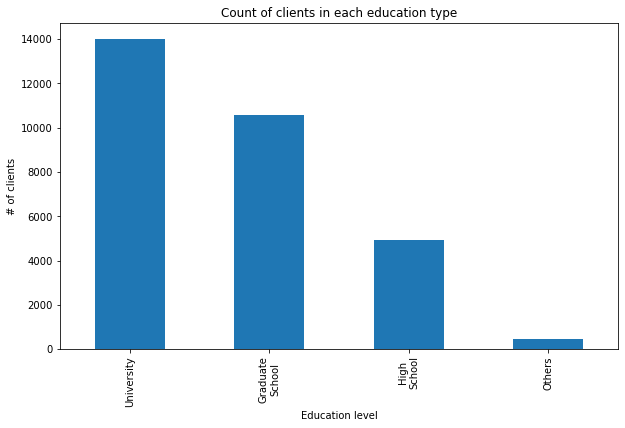

In [16]:
data['EDUCATION'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title("Count of clients in each education type")
plt.xticks([0,1,2,3],['University','Graduate\nSchool', 'High\nSchool', 'Others'])
plt.xlabel('Education level')
plt.ylabel('# of clients')
#plt.savefig('Fig - Education Level barplot.png')
  
    

Text(0, 0.5, '# of clients')

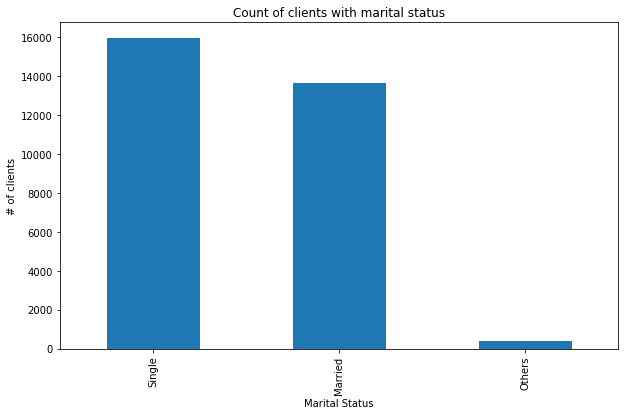

In [17]:
data['MARRIAGE'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title("Count of clients with marital status")
plt.xticks([0,1,2],['Single','Married', 'Others'])
plt.xlabel('Marital Status')
plt.ylabel('# of clients')
#plt.show()
#plt.savefig('Fig - Marital Status.png')

In [18]:
# Payment delay description
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29
std,1.12,1.20,1.20,1.17,1.13,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [19]:
# since PAY_n can take as values only -1,1,2,3,4,5,6,7,8,9
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    # categories -2,-1 are grouped into a single class -1: pay duly
    filt = (data[att] == -2) | (data[att] == -1) 
    data.loc[filt, att] = -1
    data[att] = data[att].astype('int64')
    filter = (data[att] >= 0)
    data.loc[filter, att] = data.loc[filter, att] + 1
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,0.79,0.66,0.64,0.59,0.55,0.52
std,1.34,1.39,1.39,1.35,1.31,1.32
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,1.00,1.00,1.00,1.00,1.00,1.00
75%,1.00,1.00,1.00,1.00,1.00,1.00
max,9.00,9.00,9.00,9.00,9.00,9.00


In [20]:
def_pay1_payduly_count = len(data.loc[(data['PAY_1']==-1) & (data['Default']==1)])
nondef_pay1_payduly_count = len(data.loc[(data['PAY_1']==-1) & (data['Default']==0)])

def_pay1_del1_count = len(data.loc[(data['PAY_1']==1) & (data['Default']==1)])
nondef_pay1_del1_count = len(data.loc[(data['PAY_1']==1) & (data['Default']==0)])
def_pay1_del2_count = len(data.loc[(data['PAY_1']==2) & (data['Default']==1)])
nondef_pay1_del2_count = len(data.loc[(data['PAY_1']==2) & (data['Default']==0)])
def_pay1_del3_count = len(data.loc[(data['PAY_1']==3) & (data['Default']==1)])
nondef_pay1_del3_count = len(data.loc[(data['PAY_1']==3) & (data['Default']==0)])
def_pay1_del4_count = len(data.loc[(data['PAY_1']==4) & (data['Default']==1)])
nondef_pay1_del4_count = len(data.loc[(data['PAY_1']==4) & (data['Default']==0)])
def_pay1_del5_count = len(data.loc[(data['PAY_1']==5) & (data['Default']==1)])
nondef_pay1_del5_count = len(data.loc[(data['PAY_1']==5) & (data['Default']==0)])
def_pay1_del6_count = len(data.loc[(data['PAY_1']==6) & (data['Default']==1)])
nondef_pay1_del6_count = len(data.loc[(data['PAY_1']==6) & (data['Default']==0)])
def_pay1_del7_count = len(data.loc[(data['PAY_1']==7) & (data['Default']==1)])
nondef_pay1_del7_count = len(data.loc[(data['PAY_1']==7) & (data['Default']==0)])
def_pay1_del8_count = len(data.loc[(data['PAY_1']==8) & (data['Default']==1)])
nondef_pay1_del8_count = len(data.loc[(data['PAY_1']==8) & (data['Default']==0)])
def_pay1_del9_count = len(data.loc[(data['PAY_1']==9) & (data['Default']==1)])
nondef_pay1_del9_count = len(data.loc[(data['PAY_1']==9) & (data['Default']==0)])

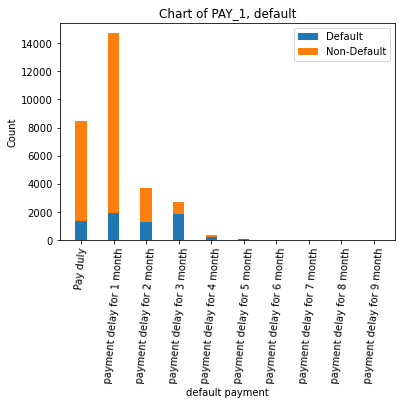

In [21]:
labels = ['Pay duly', 'payment delay for 1 month', 'payment delay for 2 month','payment delay for 3 month','payment delay for 4 month','payment delay for 5 month','payment delay for 6 month','payment delay for 7 month','payment delay for 8 month', 'payment delay for 9 month']
def_count = [def_pay1_payduly_count,def_pay1_del1_count,def_pay1_del2_count,def_pay1_del3_count,def_pay1_del4_count,def_pay1_del5_count,def_pay1_del6_count,def_pay1_del7_count,def_pay1_del8_count,def_pay1_del9_count]
nondef_count = [nondef_pay1_payduly_count,nondef_pay1_del1_count,nondef_pay1_del2_count,nondef_pay1_del3_count,nondef_pay1_del4_count,nondef_pay1_del5_count,nondef_pay1_del6_count,nondef_pay1_del7_count,nondef_pay1_del8_count,nondef_pay1_del9_count]

width = 0.35       # the width of the bars: can also be len(x) sequence


plt.bar(labels, def_count, width, label='Default')
plt.bar(labels, nondef_count, width,bottom=def_count, label='Non-Default')

plt.xticks(rotation=85)

plt.xlabel('default payment')
plt.ylabel('Count')
plt.title('Chart of PAY_1, default')
plt.legend()
plt.show()

<AxesSubplot:>

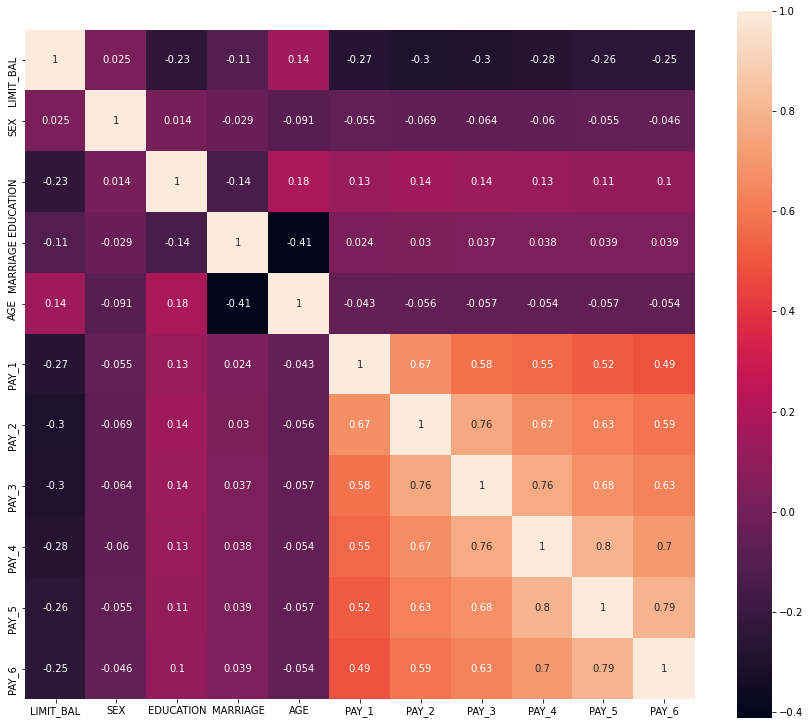

In [22]:
# Correlation matrix
var = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

f, ax = plt.subplots(figsize=(15, 13))
mydata = data[var]
mydata.corr()
# heatmap
corrmatrix = mydata.corr()
sns.heatmap(corrmatrix, square=True, annot=True)

In [23]:
# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
    data[att] = data[att].astype('category')

# one-hot encoding
data=pd.concat([pd.get_dummies(data['SEX'], prefix='SEX'),
                pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),
                data],axis=1)
# drop original columns
data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['SEX'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples
data.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,1,0,1,0,0,1,0,0,20000,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,120000,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,1,0,0,0,1,0,90000,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,1,0,0,1,0,0,50000,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,1,0,0,1,0,0,50000,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
# Separating features and target
y = data['Default']    # target default=1 or non-default=0
X = data.drop('Default', axis = 1, inplace = False)
# Check data set dimension
print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of attributes:", X.shape[1])


(30000, 29)
Number of samples: 30000
Number of attributes: 29


# One Hot encoding for categorical variable

In [25]:
data.shape


(30000, 30)

In [26]:
data.columns = data.columns.map(str.lower)

In [27]:
data.head()

,sex_1,sex_2,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,limit_bal,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,0,1,0,1,0,0,1,0,0,20000,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,120000,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,1,0,0,0,1,0,90000,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,1,0,0,1,0,0,50000,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,1,0,0,1,0,0,50000,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Step5: Feature Scaling of Numerical Attributes

In [28]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
data[col_to_norm] = data[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [29]:
data.head(10)

,sex_1,sex_2,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,limit_bal,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,0,1,0,1,0,0,1,0,0,-1.14,...,-0.67,-0.66,-0.65,-0.34,-0.23,-0.30,-0.31,-0.31,-0.29,1
1,0,1,0,1,0,0,0,1,0,-0.37,...,-0.62,-0.61,-0.60,-0.34,-0.21,-0.24,-0.24,-0.31,-0.18,1
2,0,1,0,1,0,0,0,1,0,-0.60,...,-0.45,-0.42,-0.39,-0.25,-0.19,-0.24,-0.24,-0.25,-0.01,0
3,0,1,0,1,0,0,1,0,0,-0.91,...,-0.23,-0.19,-0.16,-0.22,-0.17,-0.23,-0.24,-0.24,-0.24,0
4,1,0,0,1,0,0,1,0,0,-0.91,...,-0.35,-0.35,-0.33,-0.22,1.34,0.27,0.27,-0.27,-0.26,0
5,1,0,1,0,0,0,0,1,0,-0.91,...,-0.37,-0.34,-0.32,-0.19,-0.18,-0.26,-0.24,-0.25,-0.25,0
6,1,0,1,0,0,0,0,1,0,2.56,...,7.76,7.28,7.31,2.98,1.48,1.86,0.98,0.59,0.48,0
7,0,1,0,1,0,0,0,1,0,-0.52,...,-0.67,-0.67,-0.64,-0.32,-0.23,-0.30,-0.27,-0.20,-0.21,0
8,0,1,0,0,1,0,1,0,0,-0.21,...,-0.48,-0.47,-0.59,-0.14,-0.26,-0.27,-0.24,-0.25,-0.24,0
9,1,0,0,0,1,0,0,1,0,-1.14,...,-0.67,-0.45,-0.42,-0.34,-0.26,-0.30,0.52,-0.24,-0.29,0


In [30]:
data.tail(10)

,sex_1,sex_2,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,limit_bal,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
29990,1,0,0,1,0,0,1,0,0,-0.21,...,1.48,0.15,0.12,0.02,0.05,-0.06,-0.21,-0.18,-0.18,0
29991,1,0,0,1,0,0,1,0,0,0.33,...,-0.63,-0.62,-0.61,-0.34,-0.26,-0.30,-0.31,-0.31,-0.29,1
29992,1,0,0,0,1,0,1,0,0,-1.21,...,-0.67,-0.66,-0.65,-0.22,-0.26,-0.30,-0.31,-0.31,-0.29,0
29993,1,0,1,0,0,0,0,1,0,-0.52,...,0.43,0.48,0.27,-0.22,4.59,-0.07,-0.12,-0.18,-0.18,0
29994,1,0,0,1,0,0,0,1,0,-0.67,...,0.53,0.70,0.71,0.08,-0.11,-0.30,0.14,-0.31,-0.07,1
29995,1,0,0,0,1,0,1,0,0,0.40,...,0.70,-0.15,-0.38,0.17,0.61,-0.01,-0.11,0.01,-0.24,0
29996,1,0,0,0,1,0,0,1,0,-0.13,...,-0.53,-0.58,-0.65,-0.23,-0.10,0.21,-0.30,-0.31,-0.29,0
29997,1,0,0,1,0,0,0,1,0,-1.06,...,-0.35,-0.32,-0.33,-0.34,-0.26,0.95,-0.04,-0.18,-0.12,1
29998,1,0,0,0,1,0,1,0,0,-0.67,...,0.15,-0.47,0.17,4.84,-0.11,-0.23,-0.19,3.15,-0.19,1
29999,1,0,0,1,0,0,1,0,0,-0.91,...,-0.10,-0.13,-0.40,-0.22,-0.18,-0.22,-0.24,-0.25,-0.24,1


Step6: Spiliting Dataset into training(70%) and test set(30%)

In [31]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)
x_res, y_res = rus.fit_resample(X, Y)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_res, y_res,test_size = 0.33,random_state = 42)

In [34]:
X_train.shape

(8892, 29)

In [35]:
X_test.shape

(4380, 29)

### Step7: Applying Machine Learning Algorithm for Classification Problem

In [91]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.643498 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [92]:
y_pred = grid_search.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

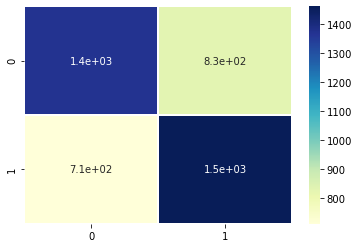

In [94]:
sns.heatmap(cfm,annot= True,linewidths=1,cmap='YlGnBu')

In [95]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc_score =roc_auc_score(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

results_log = pd.DataFrame([['Logistic Regression', acc_score,prec_score,rec_score, f1_score,roc_score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_log

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.65,0.64,0.67,0.65,0.65


### K-Nearest Neighbour
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(5, 28, 5)}   
knn_grid = GridSearchCV(knn, param_knn, cv = 5)
knn_grid.fit(X_train, y_train)
knn_grid.predict(X_test)
# 1-the best hyperparameter chosen:
print('Best k:', knn_grid.best_params_)
# 3-When k=25 (best case), the validation score of through CV is:
print('Mean Validation Score:', knn_grid.best_score_)
# 2-The test accuracy under the best model
score=knn_grid.score(X_test, y_test)
print("Test Accuracy under Best model:",score)

Best k: {'n_neighbors': 25}
Mean Validation Score: 0.69152081116336
Test Accuracy under Best model: 0.6885844748858447


In [46]:
knn = knn.fit(X_train,y_train)

In [68]:
y_pred = knn.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

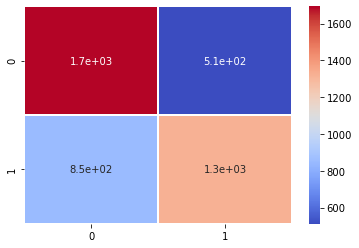

In [70]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [71]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results_knn = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_knn

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.69,0.72,0.61,0.66,0.69


### Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.


In [51]:
# # Fitting SVM to the Training set
# from sklearn.svm import SVC
# scv = SVC(kernel = 'rbf', random_state = 0)
# scv = scv.fit(X_train, y_train)

In [96]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

base_k = SVC(random_state= 0, kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C':  [0.1,1, 10]     ,
                    'gamma':   [0.01,1,10]   }
#apply grid search
grid_kernel = GridSearchCV(base_k, param_svc_kernel, cv = 10, n_jobs=2)
grid_kernel.fit(X_train, y_train)
#(1)- The best C and Gamma Chosen
print("The best C and Gamma Chosen:",grid_kernel.best_params_)
#(2)- The test Accuracy under the best model
print("The Test Accuracy under the best model:",grid_kernel.score(X_test,y_test))


The best C and Gamma Chosen: {'C': 10, 'gamma': 0.01}
The Test Accuracy under the best model: 0.7011415525114155


In [97]:
# Predicting the Test set results
y_pred = grid_kernel.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

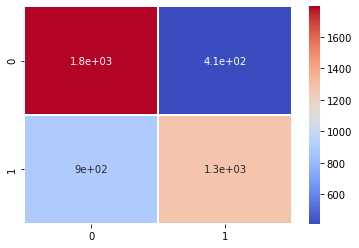

In [99]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [100]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_svm = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_svm

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.7,0.76,0.59,0.66,0.7


### Gaussian Naive Bayes

In [108]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test,y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=1.0)
0.6029680365296803


In [114]:
y_pred =nbModel_grid.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1163, 1043],
       [ 696, 1478]], dtype=int64)

<AxesSubplot:>

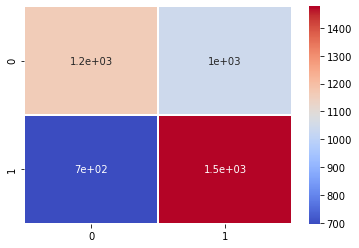

In [116]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [117]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_nb= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_nb

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.6,0.59,0.68,0.63,0.6


In [61]:
# from sklearn.tree import DecisionTreeClassifier
# dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [62]:
# dct = dct.fit(X_train,y_train)

In [63]:
# y_pred = dct.predict(X_test)

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_complete = DecisionTreeClassifier(random_state = 0)
dt_params = {'max_depth':  range(1,11)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

grid_tree = GridSearchCV(tree_complete, dt_params,cv=5)
grid_tree.fit(X_train, y_train)
#(1) The best maximum depth chosen
print("Best Parameters:",grid_tree.best_params_)
#(2) The test accuracy under the best model
print("Test Accuracy under Best model:",grid_tree.score(X_test, y_test))

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_split': 2}
Test Accuracy under Best model: 0.6938356164383561
Mean validation accuracy 0.7024292916167941


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [136]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_dt = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_dt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.72,0.76,0.63,0.69,0.72


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}


In [128]:
rfr = RandomForestClassifier(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [129]:
g_search.fit(X_train, y_train)

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 15}


In [130]:
y_pred = g_search.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [132]:
cm

array([[1774,  432],
       [ 803, 1371]], dtype=int64)

<AxesSubplot:>

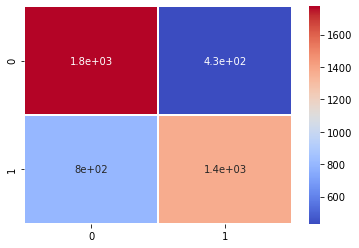

In [133]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [134]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results_rf = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results_rf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.72,0.76,0.63,0.69,0.72


In [137]:
results=results_log.append((results_knn,results_svm,results_nb,results_dt,results_rf))
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.65,0.64,0.67,0.65,0.65
0,K-Nearest Neighbour,0.69,0.72,0.61,0.66,0.69
0,Support Vector Machine,0.70,0.76,0.59,0.66,0.70
0,Gaussian Naive Bayes,0.60,0.59,0.68,0.63,0.60
0,Decision Tree Classifier,0.72,0.76,0.63,0.69,0.72
0,Random tree Classifier,0.72,0.76,0.63,0.69,0.72


In [138]:
from sklearn.ensemble import AdaBoostClassifier

# Define base model
naive_dt = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=200, learning_rate=0.5,
    random_state=42)

ada_clf.fit(X_train, y_train)

# Performance
print(ada_clf.score(X_test, y_test))

0.7061643835616438
